In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prim
import seaborn as sns
from sklearn import mixture
import os
from clustering_and_prim_tools import *

In [170]:
%matplotlib inline

In [171]:
sns.set_context("poster",rc={"font.size": 28})
sns.set_style("whitegrid")

In [172]:
invfolder = "C:\\Users\\WB451855\OneDrive - WBG\\!infra_needs_data\\water_iiasa_output_data\\"

In [173]:
data = pd.read_excel(invfolder+"data_WB_Irrigation_05june18.xlsx",sheetname="data_WB_Irrigation_27may18")

## Test the data

In [174]:
data.columns

Index(['Region', 'Var', 'Unit', 'Item', 'Macro', 'Sensitivity',
       'InvestmentType', 'Year', 'Val'],
      dtype='object')

In [175]:
data = data.reset_index().set_index(['Region', 'Var', 'Unit', 'Item', 'Macro', 'Sensitivity','InvestmentType', 'Year'])

In [176]:
data.unstack("Var").columns

MultiIndex(levels=[['index', 'Val'], ['AREA', 'ARIR', 'ARRF', 'ASYS2', 'CALO', 'CCSYS', 'CC_D06', 'CONS', 'CSYS', 'EMIS', 'GDPC', 'GDPC_D06', 'GDPD', 'GDPD_D06', 'GDPT', 'LAND', 'NETT', 'NTMS2', 'PROD', 'WDEM', 'WEFF', 'WSECT', 'XPRI', 'YILM']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]],
           names=[None, 'Var'])

In [177]:
data.unstack("Item").columns

MultiIndex(levels=[['index', 'Val'], ['ABNNAT', 'AGR', 'ALL_TOTAL', 'ALMILK', 'BARL', 'BEAD', 'BVMEAT', 'CASS', 'CER', 'CH4', 'CHKP', 'CORN', 'COTT', 'CRP', 'CRPLND', 'DEPRECIATION', 'DOMESTIC', 'EFFICIENCY', 'EXPANSION', 'FOREST', 'GNUT', 'GRSLND', 'INDUSTRIAL', 'IR_DRIP', 'IR_SPRINK', 'IR_SURFACE', 'IR_TOTAL', 'LSP', 'LUC', 'MILL', 'N2O', 'NATLND', 'OPAL', 'PGMEAT', 'PLTFOR', 'POTA', 'PTEGGS', 'PTMEAT', 'RAPE', 'RF_HIGH', 'RF_LOW', 'RF_SUBST', 'RF_TOTAL', 'RICE', 'SGMEAT', 'SHARE_AG_SWATRISK', 'SHARE_AG_SWUNSUSEFR', 'SHARE_EFRATRISK', 'SOYA', 'SRGH', 'SUGC', 'SUNF', 'SWPO', 'TOT', 'UPGRADE', 'WHEA']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1

In [178]:
data.reset_index().Sensitivity.unique()

array(['Baseline', 'Region AFR MaxInvest', 'Region ECA MaxInvest',
       'Region EAP MaxInvest', 'Region LCR MaxInvest',
       'Region MNA MaxInvest', 'Region SAR MaxInvest', 'RCP2p6_GDFL',
       'RCP2p6_HadGEM', 'RCP2p6_IPSL', 'RCP2p6_MIROC', 'RCP2p6_NOR',
       'RCP8p5_GDFL', 'RCP8p5_HadGEM', 'RCP8p5_HadGem_noCO2',
       'RCP8p5_IPSL', 'RCP8p5_MIROC', 'RCP8p5_NOR', 'HealthyDiet',
       'HealthySustDiet', 'TradeOpen', 'TradeRestr', 'WatrEff_High',
       'WatrEff_Low', 'Combined_High', 'Combined_High2', 'Combined_Low',
       'Combined_Low2'], dtype=object)

In [179]:
data.reset_index().Unit.unique()

array(['million USD 2005', 'Percent', '1000 t', 'million USD 2000',
       'dm t/ha', 'Mt CO2eq/yr', 'USD 2000 per ton', '1000 Ha', 'fm t/ha',
       'Bn USD 2005', 'kg/m3', 'percent2', '1000 t dm', 'kcal/cap/d',
       'Percent2', 'km3'], dtype=object)

In [180]:
data.reset_index().Year.unique()

array([2090, 2050, 2010, 2030, 2040, 2100, 2060, 2080, 2020, 2070], dtype=int64)

### there are two different "percent2" values so makes sure there is only one

In [181]:
data = data.reset_index("Unit")
data['Unit'] = data.Unit.replace({"Percent2":"percent2"})
data = data.set_index("Unit",append=True)

## earlier version: I discount by dividing the number in a given year by 10 and spreading the cost over 10 years

In [182]:
np.arange(2011,2021)

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [183]:
def discount_sum_over_10_years(row,name,d):
    return np.sum([row[name]/10*(1+d)**(1-(year-2010)) for year in np.arange(row["Year"]-9,row["Year"]+1)])

In [184]:
costs_global = data.unstack("Var")["Val"]["CSYS"].unstack("Unit")["million USD 2005"].dropna().unstack("Region")["WLD"].unstack("Item")["TOT"]
costs_reg = data.unstack("Var")["Val"]["CSYS"].unstack("Unit")["million USD 2005"].dropna().unstack("Region").drop("WLD",axis=1).stack().unstack("Item")["TOT"]

In [185]:
costs_global = costs_global.reset_index("Year")
costs_reg = costs_reg.reset_index("Year")

In [186]:
costs_global["disc"] = costs_global.apply(lambda y:discount_sum_over_10_years(y,"TOT",0.06),axis=1)

In [187]:
costs_reg["disc"] = costs_reg.apply(lambda y:discount_sum_over_10_years(y,"TOT",0.06),axis=1)

### Look only in 2030 and sums discounted values

In [188]:
costs_global2030 = costs_global.loc[(costs_global.Year>2010)&(costs_global.Year<2031),:]

In [189]:
costs_reg2030 = costs_reg.loc[(costs_reg.Year>2010)&(costs_reg.Year<2031),:]

In [190]:
costs_global_disc = costs_global2030.set_index("Year",append=True).disc.sum(level=["Macro","Sensitivity","InvestmentType"])

In [191]:
costs_global_disc.describe()

count        78.000000
mean     518819.337514
std      205205.870765
min      203013.733492
25%      353063.278119
50%      505838.589463
75%      704980.556164
max      883775.874671
Name: disc, dtype: float64

In [192]:
costs_reg_disc = costs_reg2030.set_index("Year",append=True).disc.sum(level=["Macro","Sensitivity","InvestmentType","Region"])

## new version: I take directly the discounted value

In [193]:
costs_discounted_world = data.unstack("Var")["Val"]["CC_D06"].unstack("Region")["WLD"].unstack("Item")["TOT"].dropna().unstack("Unit")["million USD 2005"].unstack("Year")[2030]

In [194]:
costs_discounted_reg = data.unstack("Var")["Val"]["CC_D06"].unstack("Region").drop("WLD",axis=1).stack().unstack("Item")["TOT"].dropna().unstack("Unit")["million USD 2005"].unstack("Year")[2030]

In [195]:
costs_discounted_world.describe()

count        78.000000
mean     489452.205202
std      193590.444118
min      191522.390087
25%      333078.564263
50%      477206.216474
75%      665075.996381
max      833750.825162
Name: 2030, dtype: float64

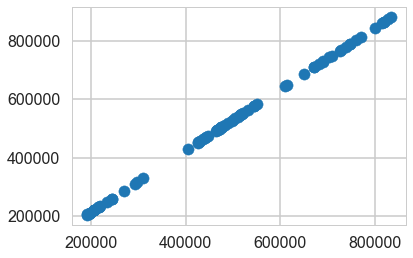

In [196]:
plt.scatter(costs_discounted_world,costs_global_disc)

the discounted value is the same as the one calculated by me

## Costs as % of GDP

In [197]:
costs_global_over_gdp = data.unstack("Var")["Val"]["CSYS"].unstack("Region")["WLD"].unstack("Item")["TOT"].dropna().unstack("Unit")["percent2"].dropna()

In [198]:
costs_region_over_gdp = data.unstack("Var")["Val"]["CSYS"].unstack("Region").drop(["WLD","EC","NAM","APD"],axis=1).stack().unstack("Item")["TOT"].dropna().unstack("Unit")["percent2"].dropna()

In [199]:
GDP_global = data.unstack("Var")["Val"]["GDPD"].dropna().unstack("Region")["WLD"].unstack("Item")["TOT"]
GDP_reg = data.unstack("Var")["Val"]["GDPD"].dropna().unstack("Region").drop(["WLD","EC","NAM","APD"],axis=1).stack().unstack("Item")["TOT"]

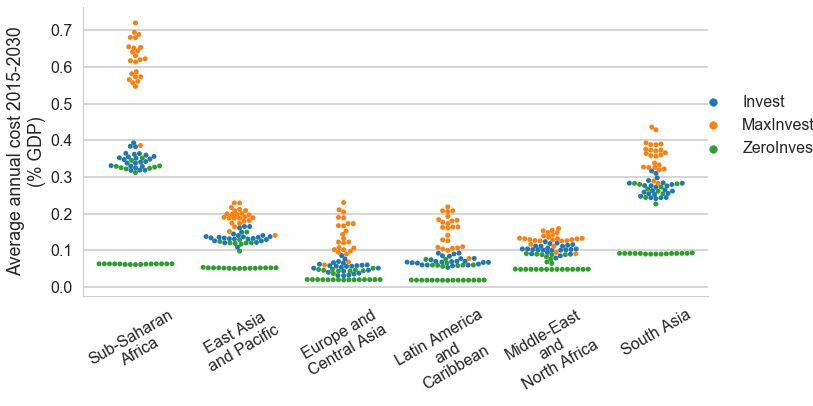

In [200]:
toplot = costs_region_over_gdp.drop(['Region AFR MaxInvest',\
       'Region EAP MaxInvest', 'Region ECA MaxInvest',\
       'Region LCR MaxInvest', 'Region MNA MaxInvest',\
       'Region SAR MaxInvest'],level="Sensitivity")
toplot = toplot.reset_index()
toplot = toplot.loc[(toplot.Year==2030),:]

#toplot['InvestmentType'] = toplot.InvestmentType.rename({"Invest":"Medium investment"})

toplot['percent2'] = 100*toplot['percent2']

toplot['Region'] = toplot.Region.replace({"EAP":"East Asia\nand Pacific",
                                             "ECA":"Europe and\nCentral Asia",
                                             "LCR":"Latin America\nand\nCaribbean",
                                             "MNA":"Middle-East\nand\nNorth Africa",
                                             "SAR":"South Asia",
                                             "AFR":"Sub-Saharan\nAfrica",
                                             "YHI":"High income"})

g = sns.factorplot(x='Region',y='percent2', hue= 'InvestmentType', data=toplot, kind="swarm",dodge=False, size=6, aspect=1.7,\
                  legend=False)
#join=False, ci="sd"

g.set_axis_labels("", "Average annual cost 2015-2030\n(% GDP)")
g.add_legend(title="",bbox_to_anchor=(0.95, 0.65), borderaxespad=0.)
plt.xticks(rotation=30)

plt.savefig("irrigation_three_scenarios_swarm.png",ddpi=300,bbox_inches="tight")
plt.savefig("irrigation_three_scenarios_swarm.pdf")

In [201]:
toplot.loc[(toplot.InvestmentType=="ZeroInvest")&(toplot.percent2>0.1),:]

,Macro,Sensitivity,InvestmentType,Year,Region,percent2
468,SSP2,RCP2p6_GDFL,ZeroInvest,2030,Sub-Saharan\nAfrica,0.323572
469,SSP2,RCP2p6_GDFL,ZeroInvest,2030,East Asia\nand Pacific,0.128462
473,SSP2,RCP2p6_GDFL,ZeroInvest,2030,South Asia,0.267039
522,SSP2,RCP2p6_HadGEM,ZeroInvest,2030,Sub-Saharan\nAfrica,0.326680
523,SSP2,RCP2p6_HadGEM,ZeroInvest,2030,East Asia\nand Pacific,0.118457
527,SSP2,RCP2p6_HadGEM,ZeroInvest,2030,South Asia,0.226199
576,SSP2,RCP2p6_IPSL,ZeroInvest,2030,Sub-Saharan\nAfrica,0.328820
577,SSP2,RCP2p6_IPSL,ZeroInvest,2030,East Asia\nand Pacific,0.149470
581,SSP2,RCP2p6_IPSL,ZeroInvest,2030,South Asia,0.243765
630,SSP2,RCP2p6_MIROC,ZeroInvest,2030,Sub-Saharan\nAfrica,0.344999


### impact of climate change on irrigation costs

In [202]:
costs_region_over_gdp.unstack("Sensitivity")[['RCP2p6_IPSL', 'RCP2p6_MIROC', 'RCP2p6_NOR',
       'RCP8p5_GDFL', 'RCP8p5_HadGEM', 'RCP8p5_HadGem_noCO2',
       'RCP8p5_IPSL', 'RCP8p5_MIROC', 'RCP8p5_NOR']].sub(costs_region_over_gdp.unstack("Sensitivity")["Baseline"],axis=0).dropna().drop([2050,2100],level="Year")

Sensitivity                        RCP2p6_IPSL  RCP2p6_MIROC  RCP2p6_NOR  \
Macro InvestmentType Year Region                                           
SSP2  Invest         2030 AFR    -8.605604e-05      0.000051    0.000023   
                          EAP     2.698997e-04      0.000027   -0.000048   
                          ECA     1.275171e-04      0.000080    0.000079   
                          LCR    -1.038641e-04      0.000076   -0.000096   
                          MNA     7.565029e-07     -0.000132   -0.000246   
                          SAR    -1.031774e-04      0.000259    0.000044   
      MaxInvest      2030 AFR    -1.198839e-03     -0.000609   -0.002946   
                          EAP     1.088296e-04     -0.000132   -0.000600   
                          ECA    -6.097053e-04     -0.000773   -0.001075   
                          LCR    -8.548187e-04     -0.000637   -0.001146   
                          MNA    -1.526603e-05     -0.000224   -0.000424   
                          SAR    -3.849494e-04      0.000167   -0.000820   
      ZeroInvest     2030 AFR     2.658236e-03      0.002820    0.002618   
                          EAP     9.735996e-04      0.000718    0.000644   
                          ECA     2.736209e-04      0.000234    0.000232   
                          LCR     4.038865e-04      0.000574    0.000414   
                          MNA     4.126853e-04      0.000277    0.000202   
                          SAR     1.521300e-03      0.001880    0.001692   

Sensitivity                       RCP8p5_GDFL  RCP8p5_HadGEM  \
Macro InvestmentType Year Region                               
SSP2  Invest         2030 AFR       -0.000298  -3.086147e-04   
                          EAP       -0.000006  -3.248147e-05   
                          ECA        0.000228   1.665498e-04   
                          LCR       -0.000122  -1.504364e-04   
                          MNA       -0.000022   1.195949e-04   
                          SAR        0.000112  -2.783120e-04   
      MaxInvest      2030 AFR       -0.000935  -4.023540e-04   
                          EAP       -0.000265  -1.271010e-04   
                          ECA       -0.000656  -5.935050e-06   
                          LCR       -0.000922  -1.227473e-04   
                          MNA       -0.000067   6.238826e-05   
                          SAR        0.000025  -5.196307e-04   
      ZeroInvest     2030 AFR        0.002589  -2.320970e-06   
                          EAP        0.000677  -7.462909e-06   
                          ECA        0.000261  -2.871767e-06   
                          LCR        0.000375  -2.869984e-06   
                          MNA        0.000343   5.382653e-07   
                          SAR        0.001896  -1.391747e-05   

Sensitivity                       RCP8p5_HadGem_noCO2  RCP8p5_IPSL  \
Macro InvestmentType Year Region                                     
SSP2  Invest         2030 AFR               -0.000216    -0.000347   
                          EAP               -0.000017     0.000032   
                          ECA                0.000221     0.000148   
                          LCR               -0.000114    -0.000031   
                          MNA                0.000101     0.000027   
                          SAR               -0.000166    -0.000197   
      MaxInvest      2030 AFR               -0.000369    -0.001336   
                          EAP               -0.000107    -0.000196   
                          ECA                0.000373    -0.000653   
                          LCR               -0.000085    -0.000872   
                          MNA                0.000099    -0.000038   
                          SAR               -0.000494    -0.000442   
      ZeroInvest     2030 AFR               -0.000023     0.002487   
                          EAP               -0.000011     0.000682   
                          ECA               -0.000011     0.000240   
        

## Calories

### Unfinished: trying to explore the link between the irrigation scenarios and calories per capita

In [203]:
calories_global = data.unstack("Var")["Val"]["CALO"].dropna().unstack("Region")["WLD"].unstack("Item")["TOT"]
calories_reg = data.unstack("Var")["Val"]["CALO"].dropna().unstack("Region").drop(["WLD","EC","NAM","APD"],axis=1).stack().unstack("Item")["TOT"]

In [204]:
calories_global_2030 = calories_global.unstack("Year")[2030]
calories_reg_2030 = calories_reg.unstack("Year")[2030]

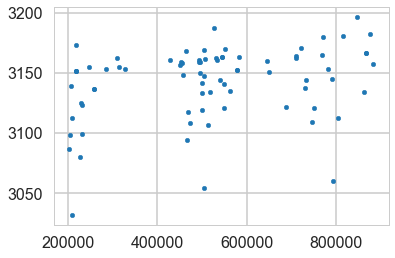

In [205]:
plt.scatter(costs_global_disc,calories_global_2030,s=20)

In [206]:
global_data = costs_global_disc.reset_index().merge(calories_global_2030.reset_index().rename(columns={2030:"calories"}),on=["Macro","Sensitivity","InvestmentType"]).drop("Unit",axis=1)

In [207]:
global_data.loc[(global_data.disc<800000)&(global_data.calories>3150),:]

,Macro,Sensitivity,InvestmentType,disc,calories
0,SSP1,Baseline,Invest,451165.845831,3156.677008
1,SSP1,Baseline,MaxInvest,722743.893813,3170.809599
3,SSP1,Combined_Low,Invest,577675.473473,3152.378665
6,SSP1,Combined_Low2,Invest,577675.473473,3152.378665
9,SSP2,Baseline,Invest,503835.142093,3169.043205
11,SSP2,Baseline,ZeroInvest,218288.808541,3151.693866
24,SSP2,RCP2p6_GDFL,Invest,545609.774124,3163.066110
25,SSP2,RCP2p6_GDFL,MaxInvest,710359.227675,3163.689458
26,SSP2,RCP2p6_GDFL,ZeroInvest,506020.475831,3161.824734
27,SSP2,RCP2p6_HadGEM,Invest,493717.971093,3158.802781


In [208]:
global_data.loc[(global_data.calories<3100),:]

,Macro,Sensitivity,InvestmentType,disc,calories
14,SSP2,Combined_High,ZeroInvest,231444.615084,3098.835262
20,SSP2,HealthyDiet,ZeroInvest,204084.111982,3098.614429
21,SSP2,HealthySustDiet,Invest,466802.437610,3094.443896
23,SSP2,HealthySustDiet,ZeroInvest,203013.733492,3086.440626
47,SSP2,RCP8p5_HadGem_noCO2,ZeroInvest,228041.797480,3080.151491
75,SSP3,Baseline,Invest,505656.703094,3054.528093
76,SSP3,Baseline,MaxInvest,792461.306672,3059.900130
77,SSP3,Baseline,ZeroInvest,209277.328833,3032.044321


In [209]:
toplot = costs_region_over_gdp.reset_index().merge(calories_reg_2030.reset_index().rename(columns={2030:"calories"}),on=["Macro","Sensitivity","InvestmentType","Region"]).drop("Unit",axis=1)
toplot["percent2"] = 100*toplot.percent2

(0, 0.8)

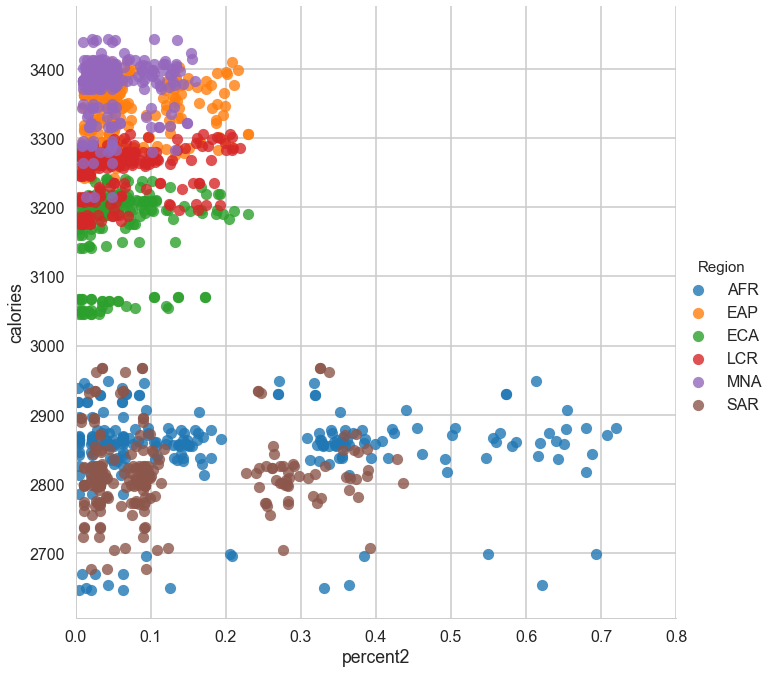

In [210]:
sns.lmplot("percent2", "calories", data=toplot, hue='Region', fit_reg=False, size=10, aspect = 1)
plt.xlim([0,0.8])